In [1]:
import matplotlib.pyplot as plt
import numpy as np
from pathlib import Path

# %matplotlib widget
plt.style.use("ggplot")

In [9]:
all_data = []

dirs = list(Path("data").glob("[!T.]*"))
dirs.sort()
for in_dir in dirs:
    files = list(in_dir.glob("*.csv"))
    files.sort()

    rms_in_arr = []
    rms_out_arr = []
    freq_arr = []
    res_arr = []

    for file in files:
        freq = float(file.stem.split("_")[1])
        data = np.loadtxt(file, delimiter=",")

        rms_out, rms_in = np.sqrt((data**2).mean(axis=0))
        res = 1000 * (rms_in / rms_out - 1)

        freq_arr.append(freq)
        rms_in_arr.append(rms_in)
        rms_out_arr.append(rms_out)
        res_arr.append(res)
    
    res_arr = np.array(res_arr)
    freq_arr = np.array(freq_arr)
    
    all_data.append([freq_arr, res_arr])

34.5 45.5
36.0 44.0
49.5 60.5
50.0 60.0


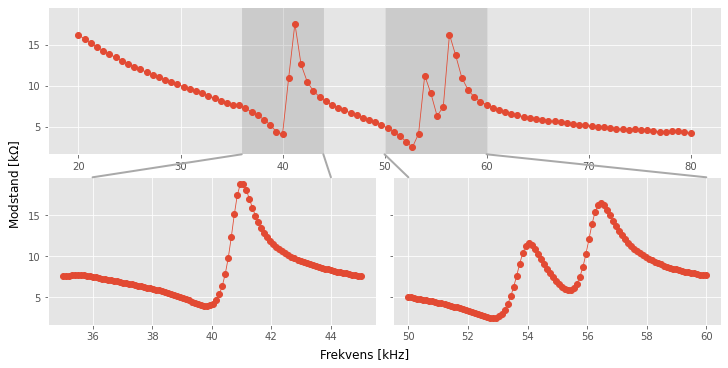

In [87]:
from matplotlib.patches import ConnectionPatch
from matplotlib.transforms import blended_transform_factory
from typing import Dict

(freq1, res1), (freq2, res2), (freq3, res3) = all_data

axd: Dict[str, plt.Axes]
fig, axd = plt.subplot_mosaic([['top', 'top'], ['left', 'right']], figsize=(10,5), sharey=True)

axd["top"].plot  (freq1/1000, res1/1000, marker="o", c="C0")
axd["left"].plot (freq2/1000, res2/1000, marker="o", c="C0")
axd["right"].plot(freq3/1000, res3/1000, marker="o", c="C0")


trans = {k: blended_transform_factory(v.transData, v.transAxes) for k, v in axd.items()}
for i, k in [[1, "left"], [2, "right"]]:
    l1, l2 = axd[k].get_xlim()
    l1 = np.ceil(l1 / 2) * 2
    l2 = np.floor(l2 / 2) * 2
    axd["top"].axvspan(l1, l2, color="gray", alpha=0.25)
    for l in [l1, l2]:
        con = ConnectionPatch(xyA=(l, 0), xyB=(l, 1),
                              coordsA=trans["top"], coordsB=trans[k],
                             axesA=axd["top"], axesB=axd[k],
                             color="darkgray", lw=2)
        con.set_in_layout(False)
        fig.add_artist(con)

fig.supxlabel(r"Frekvens [kHz]")
fig.supylabel(r"Modstand [k$\Omega$]")

fig.savefig("plots/frekvenskare.pdf")

In [3]:
ress = []
freqs = []

dirs = list(Path("data").glob("T*P1"))
dirs.sort()
for idx, in_dir in enumerate(dirs):
    print(in_dir)
    out_path = Path("plots", in_dir.stem + ".pdf")
    files = list(in_dir.glob("*.csv"))
    files.sort()

    rms_in_arr = []
    rms_out_arr = []
    freq_arr = []
    res_arr = []

    for file in files:
        freq = float(file.stem.split("_")[1])
        data = np.loadtxt(file, delimiter=",")

        rms_out, rms_in = np.sqrt((data**2).mean(axis=0))
        res = 1000 * (rms_in / rms_out - 1)

        freq_arr.append(freq)
        rms_in_arr.append(rms_in)
        rms_out_arr.append(rms_out)
        res_arr.append(res)
    
    ress.append(np.array(res_arr))
    freqs.append(np.array(freq_arr))

data/T1P1
data/T2P1
data/T3P1
data/T4P1


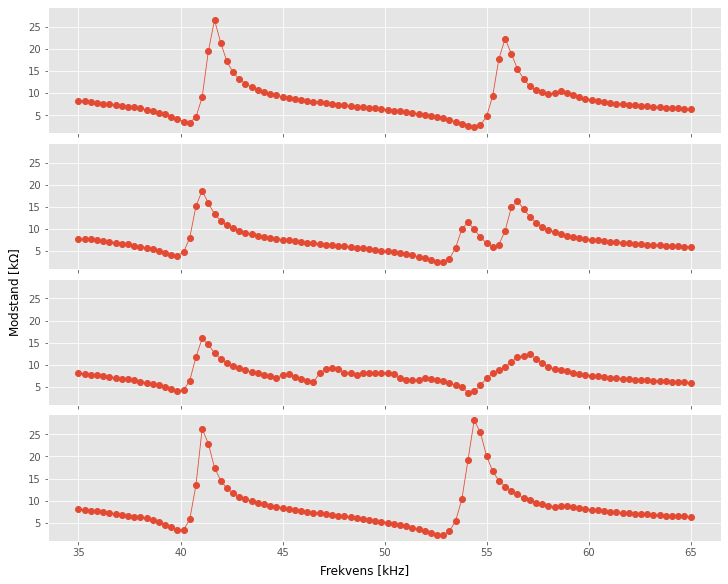

In [4]:
plt.close("all")
fig, axs = plt.subplots(4, 1, sharex=True, sharey=True, figsize=(10,8))

for idx, (freq_arr, res_arr) in enumerate(zip(freqs, ress)):
    # fig, ax = plt.subplots(1, 1, figsize=(10,4))
    axs[idx].plot(freq_arr/1000, res_arr/1000, marker="o", c="C0")
    # ax.set_title(in_dir)
    # ax.set_xscale("log")
    axs[idx].grid(True, "both")
    # axs[idx].set_xlabel(r"Frekvens [kHz]")
    # axs[idx].set_ylabel(r"Modstand [k$\Omega$]")

fig.supylabel(r"Modstand [k$\Omega$]")
fig.supxlabel(r"Frekvens [kHz]")

out_path.parent.mkdir(exist_ok=True, parents=True)
plt.show()
fig.savefig("plots/sammenligning.pdf")